In [8]:
from test_device import tRNSDevice, example_load_wav_preset
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.fft import fft, ifft, fftfreq
import numpy as np

In [12]:
raw_array= tRNSDevice(port='/dev/ttyACM0').get_adc_data()

Запрос ADC данных...
[ESP32 LOG] CMD received: 0x82, len=0
DEBUG: msg_type = 0x02, payload size = 81920 bytes
✓ Получено 40960 сэмплов
  Первые 10 значений: [2257 2257 2275 2288 2302 2309 2327 2341 2367 2371]
  Min=1839, Max=2743, Mean=2291.7


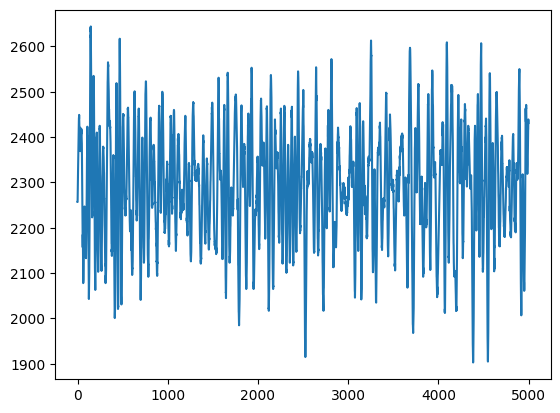

In [14]:
plt.plot(raw_array[:5000])

In [15]:
len(raw_array)

40960

(array([   72.,   414.,  2331.,  6920., 10690., 10766.,  6825.,  2414.,
          470.,    58.]),
 array([1839. , 1929.4, 2019.8, 2110.2, 2200.6, 2291. , 2381.4, 2471.8,
        2562.2, 2652.6, 2743. ]),
 <BarContainer object of 10 artists>)

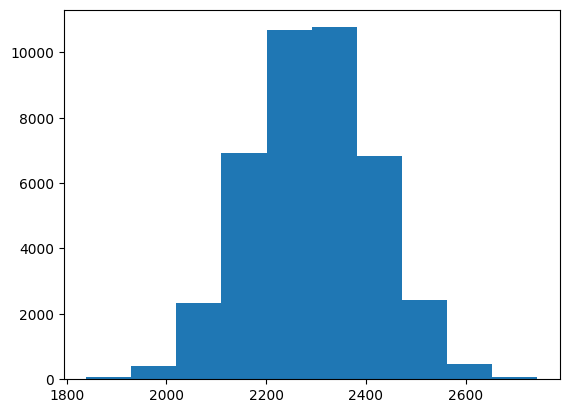

In [16]:
plt.hist(raw_array)

In [21]:
raw_array = raw_array - raw_array.mean()

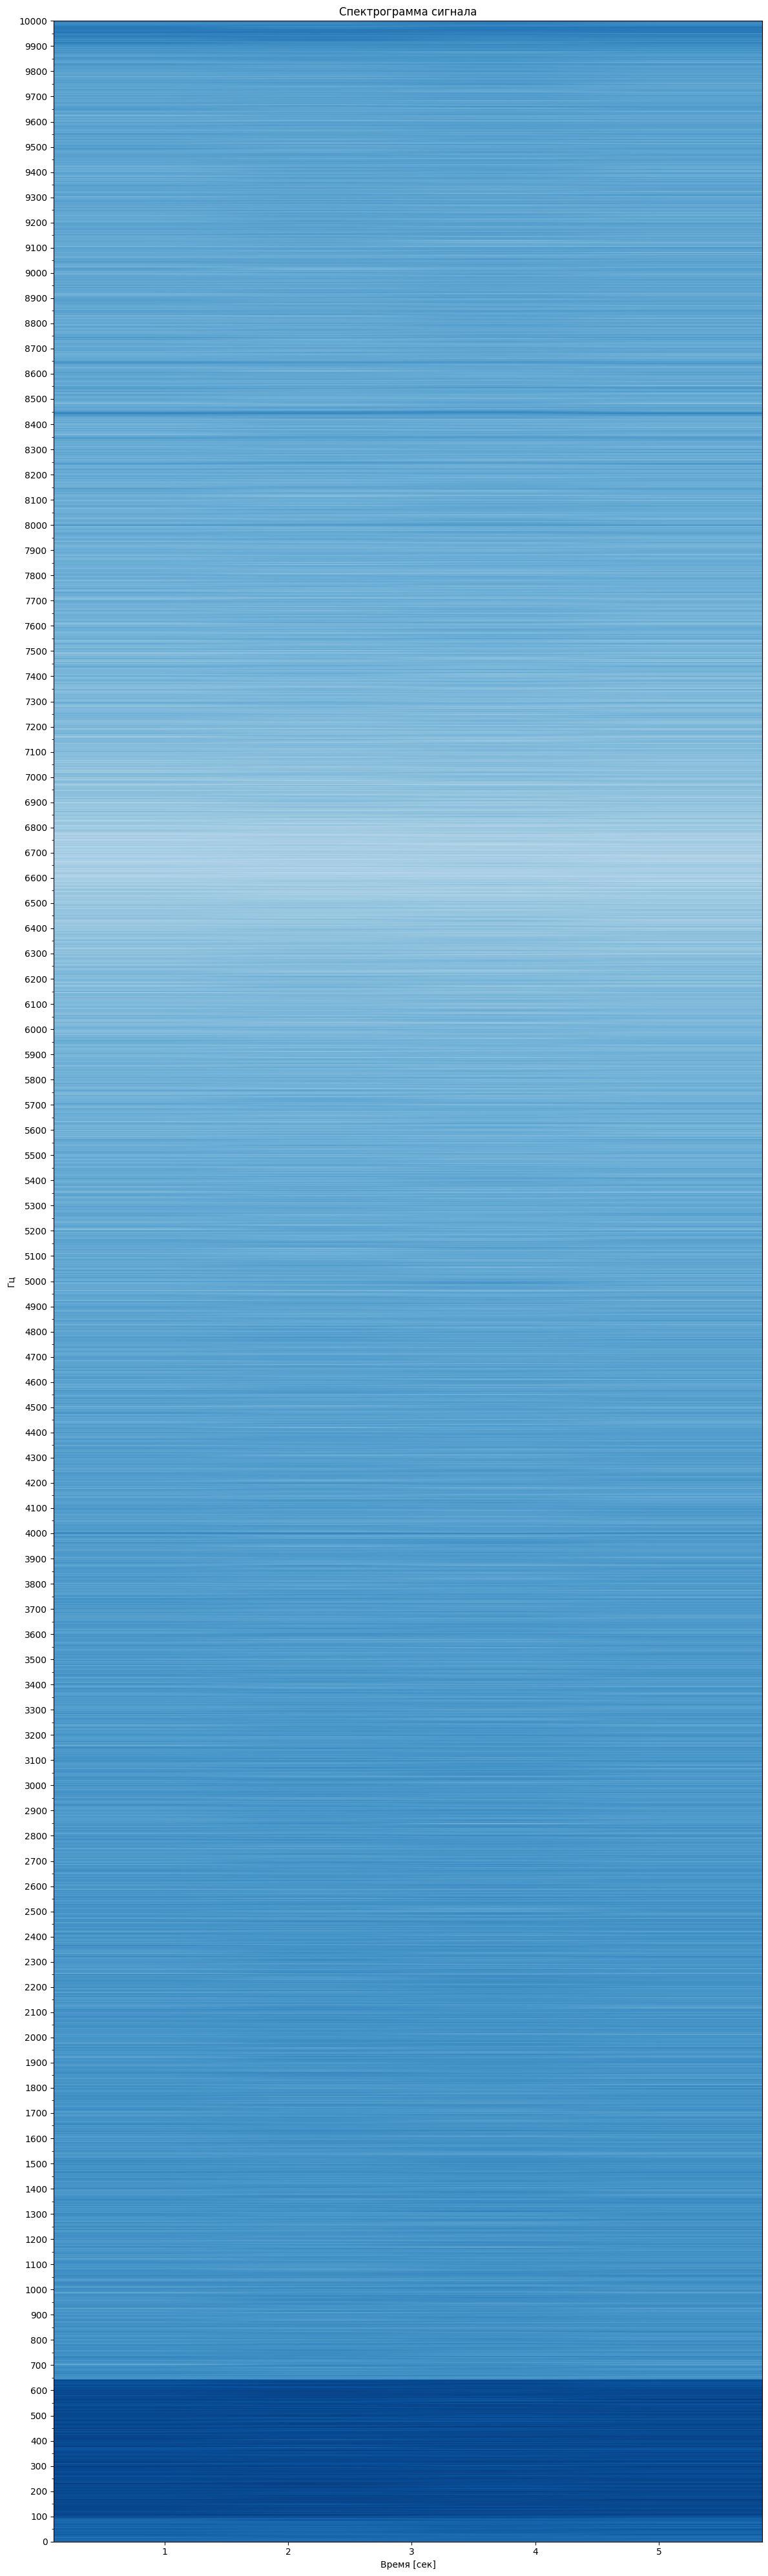

In [28]:
def plot_spectrogram_to_ax(ax, loop_signal, title, sample_rate=8000, NFFT=32768, noverlap=4096, cmap='Blues'):
    signal = np.concatenate([loop_signal, loop_signal, loop_signal])
    ax.specgram(signal, NFFT=NFFT, Fs=sample_rate, noverlap=noverlap, cmap=cmap)
    ax.set_xlabel('Время [сек]')
    ax.set_ylabel('Гц')
    ax.set_ylim(0, sample_rate / 2)
    ax.major_locator = ticker.MultipleLocator(base=100)
    ax.yaxis.set_major_locator(ax.major_locator)
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=50)) 
    ax.set_title(title)

fig, axes = plt.subplots(1, 1, figsize=(12, 40))
plot_spectrogram_to_ax(axes, raw_array,  'Спектрограмма сигнала', sample_rate=20000,)


plt.tight_layout()
plt.show()

In [25]:
filtered = (raw_array[2:]+raw_array[1:-1]+raw_array[0:-2])/3

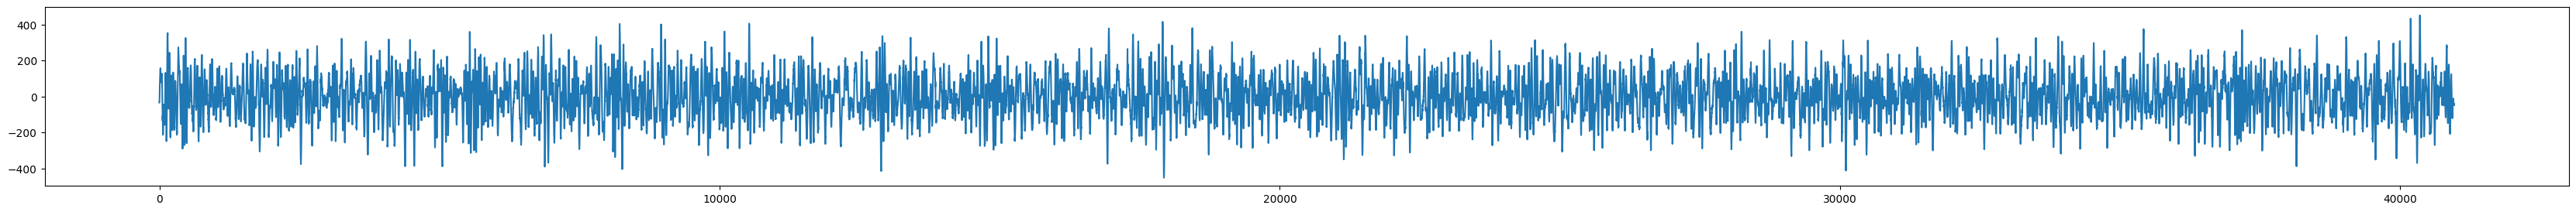

In [26]:
plt.subplots(1, 1, figsize=(42, 3))
plt.plot(raw_array[:45500])

In [27]:
example_load_wav_preset(port='/dev/ttyACM0')

=== Загрузка пресета из WAV ===
Загружено 16384 сэмплов из noise_100_640_8000Hz_16bit.wav
  Min=-32767, Max=30864, Mean=-0.0
→ Отправка пресета 'tRNS 100-640Hz normal bipolar' (16384 сэмплов, 32798 байт)...
  Отправка: cmd=0x83, payload=32798 байт, total=32807 байт
  Ожидание сохранения в NVS (может занять несколько секунд)...
[ESP32 LOG] CMD received: 0x83, len=32798
[ESP32 LOG] Prefilling DMA buffers...
[ESP32 LOG] DMA prefilled: 3 fragments (~300.0 ms)
[ESP32 LOG] ADC capture scheduled in 200ms
[ESP32 LOG] Signal buffer updated: 16384 samples (MONO)
[ESP32 LOG] Saving preset 'tRNS 100-640Hz normal bipolar' to NVS...
[ESP32 LOG] WARN: Failed to save preset to NVS
✓ Пресет загружен и сохранён в NVS
✓ Пресет 'tRNS 100-640Hz normal bipolar' загружен и сохранён на устройстве
  При следующем запуске устройство загрузит этот пресет автоматически
[ESP32 LOG] DAC buffer updated (MONO): 'tRNS 100-640Hz normal bipolar'
